# Train model

### Imports

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

pd.pandas.set_option('display.max_columns', None)

### Load train and test sets with engineered features

In [12]:
X_train = pd.read_csv('data/xtrain.csv')
X_test = pd.read_csv('data/xtest.csv')

X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.750000,0.75,0.461171,0.366365,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.75,1.0,0.666667,0.666667,0.666667,1.0,0.002835,0.6,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.2,0.75,0.018692,1.0,0.75,0.430183,0.5,0.75,1.0,0.116686,0.032907,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
1,0.750000,0.75,0.456066,0.388528,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,0.75,0.5,0.333333,0.666667,0.000000,0.8,0.142807,0.6,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.75,0.457944,0.5,0.25,0.220028,0.5,0.75,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.50,1.0,0.0,0.636364,0.666667,0.75,0.0,0.0,0.0
2,0.916667,0.75,0.394699,0.336782,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,0.75,1.0,1.000000,0.666667,0.000000,1.0,0.080794,0.6,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.75,0.046729,0.5,0.50,0.406206,0.5,0.75,1.0,0.228705,0.149909,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.090909,0.666667,0.75,0.0,0.0,0.0
3,0.750000,0.75,0.445002,0.482280,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.75,1.0,0.666667,0.666667,1.000000,1.0,0.255670,0.6,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.75,0.084112,0.5,0.50,0.362482,0.5,0.75,1.0,0.469078,0.045704,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.666667,0.75,1.0,0.0,0.0
4,0.750000,0.75,0.577658,0.391756,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,0.75,0.5,0.333333,0.666667,0.000000,0.2,0.086818,0.6,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.75,0.411215,0.5,0.50,0.406206,0.5,0.75,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0


In [4]:
y_train = pd.read_csv('data/ytrain.csv')
y_test = pd.read_csv('data/ytest.csv')

y_train.head()

,SalePrice
0,12.211060
1,11.887931
2,12.675764
3,12.278393
4,12.103486


### Load preselected features

In [14]:
features = pd.read_csv('data/selected_features.csv')
features = features['0'].to_list()

features

['MSSubClass',
 'MSZoning',
 'LotArea',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'PavedDrive',
 'WoodDeckSF',
 'ScreenPorch',
 'SaleCondition']

### Reduce train and test sets to selected features only

In [15]:
X_train = X_train[features]
X_test = X_test[features]

X_train.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,PavedDrive,WoodDeckSF,ScreenPorch,SaleCondition
0,0.750000,0.75,0.366365,0.333333,0.0,0.863636,0.777778,0.50,0.049180,0.0,1.0,0.333333,0.666667,1.0,0.666667,0.666667,1.00,1.0,0.559760,0.0,0.523250,0.000000,0.666667,0.0,0.666667,0.416667,1.0,0.000000,0.2,1.0,0.75,1.0,0.116686,0.0,0.75
1,0.750000,0.75,0.388528,0.333333,0.0,0.363636,0.444444,0.75,0.049180,0.0,0.6,0.666667,0.666667,0.5,0.333333,0.000000,1.00,1.0,0.434539,0.0,0.406196,0.333333,0.333333,0.5,0.666667,0.250000,1.0,0.000000,0.2,0.5,0.25,1.0,0.000000,0.0,0.75
2,0.916667,0.75,0.336782,0.000000,0.0,0.954545,0.888889,0.50,0.098361,1.0,0.3,0.666667,1.000000,1.0,1.000000,0.000000,1.00,1.0,0.627205,0.0,0.586296,0.333333,0.666667,0.0,1.000000,0.333333,1.0,0.333333,0.8,0.5,0.50,1.0,0.228705,0.0,0.75
3,0.750000,0.75,0.482280,0.666667,0.0,0.454545,0.666667,0.50,0.163934,0.0,1.0,0.333333,0.666667,1.0,0.666667,1.000000,1.00,1.0,0.566920,0.0,0.529943,0.333333,0.666667,0.0,0.666667,0.250000,1.0,0.333333,0.4,0.5,0.50,1.0,0.469078,0.0,0.75
4,0.750000,0.75,0.391756,0.333333,0.0,0.363636,0.555556,0.50,0.737705,0.0,0.6,0.666667,0.333333,0.5,0.333333,0.000000,0.75,1.0,0.549026,0.0,0.513216,0.000000,0.666667,0.0,0.333333,0.416667,1.0,0.333333,0.8,0.5,0.50,1.0,0.000000,0.0,0.75


### Fit model

In [16]:
lin_model = Lasso(alpha=0.001, random_state=0)

lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=0)

### Evaluate model

In [19]:
pred = lin_model.predict(X_train)

print('train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(pred))))
print('train rmse: {}'.format(root_mean_squared_error(np.exp(y_train), np.exp(pred))))
print('train r2: {}'.format(r2_score(np.exp(y_train), np.exp(pred))))

train mse: 782573591.8571126
train rmse: 27974.516829734748
train r2: 0.874664531760883


In [20]:
pred = lin_model.predict(X_test)
print('test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(pred))))
print('test rmse: {}'.format(root_mean_squared_error(np.exp(y_test), np.exp(pred))))
print('test r2: {}'.format(r2_score(np.exp(y_test), np.exp(pred)))) 

test mse: 1053612107.9128041
test rmse: 32459.391675026876
test r2: 0.8466829987617334


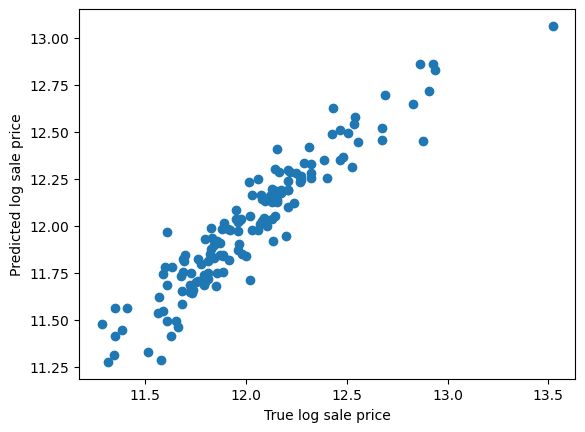

In [21]:
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True log sale price')
plt.ylabel('Predicted log sale price')
plt.show()

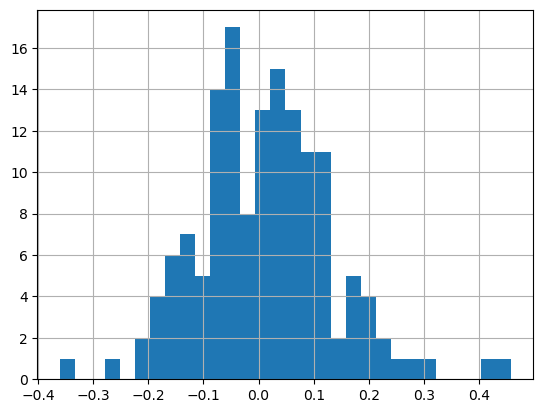

In [23]:
resids = y_test['SalePrice'] - lin_model.predict(X_test)
resids.hist(bins=30)
plt.show()

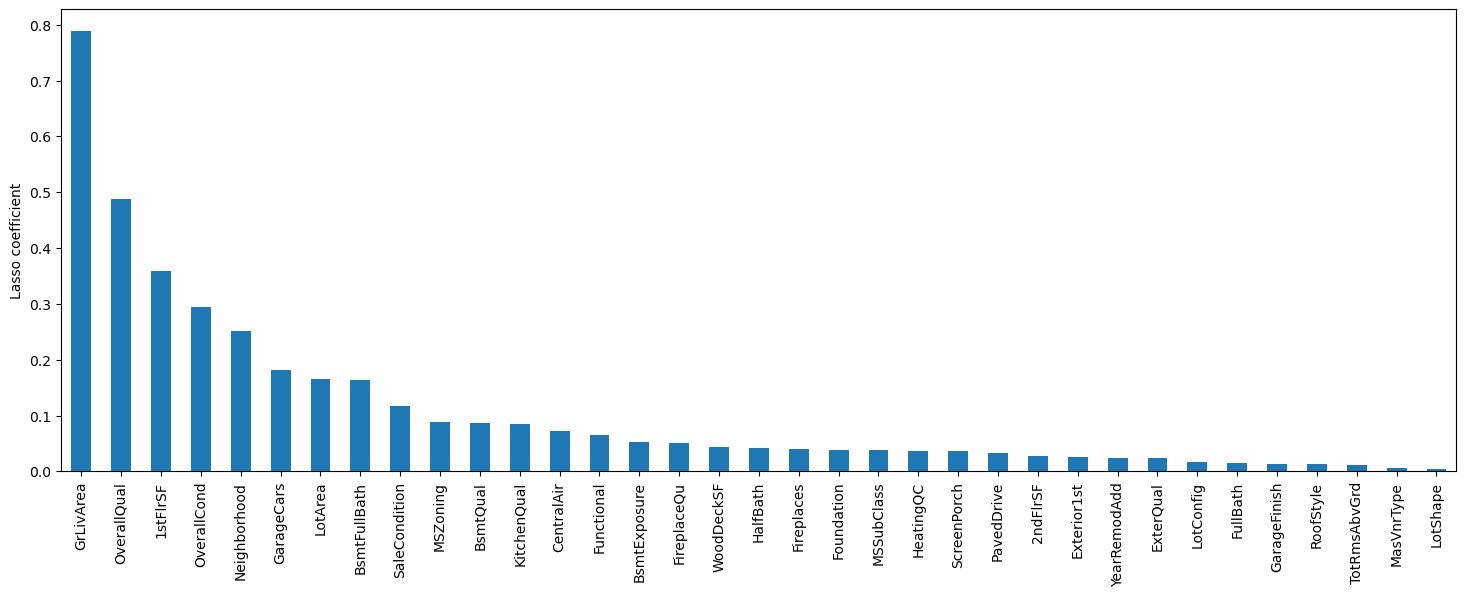

In [30]:
importance = pd.Series(np.abs(lin_model.coef_))
importance.index = features
importance.sort_values(ascending=False, inplace=True)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso coefficient')
plt.show()

### Save trained model

In [31]:
joblib.dump(lin_model, 'data/linear_regression.joblib')

['data/linear_regression.joblib']